# Reinforcement Learning Crash Course

This notebook serves as a supplementary resource for teaching Reinforcement Learning. It provides a concise overview of how RL works, illustrated through the classic CartPole balancing problem.

## Setting up the Environment
`Environment` receives the agent’s actions, changes its state, and provides observations back to the agent.

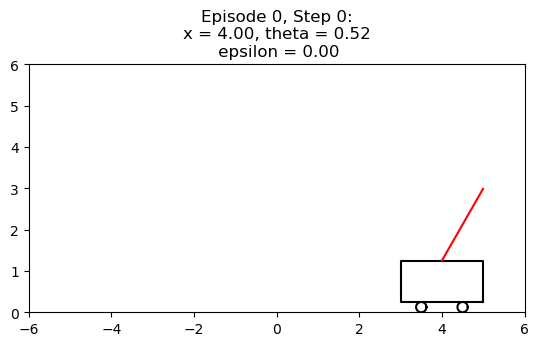

In [ ]:
from examples.python.cartpole_from_scratch.environment import Environment

env = Environment()
env.draw_plot(x=4, theta=0.52)

Task 1: Try replacing the value of x and theta

`env.draw_plot(x=-2, theta=0.52)`

then,

`env.draw_plot(x=2, theta=-0.52)`

## Defining the State
`State` a state is a snapshot of the environment at a given time. It contains the information the agent needs to make a decision about what action to take next.

In [ ]:
from examples.python.cartpole_from_scratch.state import State

state = State(n_states=256)    # n_states = n_bins**4
state.x = 2.0
state.x_dot = 0.2
state.theta = 0.12
state.theta_dot = 0.5
print(state.compute_state_value())

Task 2: Try replacing the values of any of the state parameters (x, x_dot, theta, theta_dot)

Example:<br>
`state.x = 0`<br>
`state.x_dot = 0`<br>
`state.theta = 0`<br>
`state.theta_dot = 0`

Question: What do we represent the state with a singular scalar integer?

## Defining the Reward
`Reward` is a signal from the environment that tells the agent how good or bad its last action was.

In [ ]:
from examples.python.cartpole_from_scratch.reward import Reward 

reward = Reward()
state.x = 0
state.x_dot = 0
state.theta = 0
state.theta_dot = 0
state_value = state.compute_state_value()
print(reward.compute_reward(state_value))

Task 3: Try replacing the state parameter values. Note: `1.0` means no-fail, while `0.0` means fail.

Example:<br>
`state.x = 5.1`<br>
`state.x_dot = 0`<br>
`state.theta = 0`<br>
`state.theta_dot = 0`

Question: What if we modify the reward system where `0.0` for every time step the pole remains balanced, while `-1.0` when the pole falls?


## Defining the Action
`Action` is a choice the agent makes to interact with the environment at a given state.

In [ ]:
from examples.python.cartpole_from_scratch.action import Action

action = Action()
print(action.explore())

Task: Try rerunning the cell above multiple times to witness the randomly decided actions.

## Constructing an Agent
`Agent` is the learner or decision-maker that interacts with the environment to achieve a goal.

In [ ]:
from examples.python.cartpole_from_scratch.agent import Agent

agent_q = Agent(algorithm='Q', n_states=256, n_actions=2)
print(action.exploit(agent_q, state))

Let us first try using `Q-learning` algorithm. We can visualize the initial Q matrix where all values are zero:

In [ ]:
print(agent_q.algorithm.Q)

Next, let us try using `SARSA` algorithm for the agent. We can visualize its initial Q matrix by:

In [ ]:
from examples.python.cartpole_from_scratch.agent import Agent

agent_sarsa = Agent(algorithm='SARSA', n_states=256, n_actions=2)
print(agent_sarsa.algorithm.Q)

## Training
We will try to train the agent using both algorithm. We can do this by executing the `demo.py`. 
<br><br>
For training with `Q-learning`:

In [ ]:
!python demo.py --mode train --algorithm Q --n_episodes 10 --n_steps 10 --n_states 256 --save_path examples/python/cartpole_from_scratch/Q.csv

Figure(640x480)


For training with `SARSA`:

In [ ]:
!python demo.py --mode train --algorithm SARSA --n_episodes 2000 --n_steps 2500 --n_states 256 --save_path examples/python/cartpole_from_scratch/SARSA.csv

## Testing

Lastly, we can test your trained agent.
<br><br>
For testing with `Q-learning`:

In [ ]:
!python demo.py --mode test --algorithm Q --data_path examples/python/cartpole_from_scratch/Q.csv

For testing with `SARSA`:

In [ ]:
!python demo.py --mode test --algorithm SARSA --data_path examples/python/cartpole_from_scratch/SARSA.csv